In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

DATA_DIR = Path('./data')
REAL_DATA = Path(DATA_DIR / 'original/Real')

PROC_DIR = Path(DATA_DIR / 'processed')


In [2]:
real_files = [f for f in PROC_DIR.iterdir()]

In [3]:
# real_files = [f for f in REAL_DATA.iterdir()]
# # real_files

# for f in real_files:
#     with open(f, 'r') as tmp:
#         lines = tmp.readlines()

#         values = lines[2].replace('#', '').split(',')

#         values = [v.strip() for v in values]

#         lines[2] = ','.join(values) + '\n'

#         with open(f"{PROC_DIR / f.stem}.csv" , 'w') as out:
#             out.writelines(lines)
#         # print(lines[2])

In [4]:
def plot_file_data(paths : list, columns : list = ['R [Rsun]', 'B [G]', 'alpha [deg]'], num_rows : int = 640):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

    fig.set_figheight(10)
    fig.set_figwidth(10)
    x_values = [x for x in range(num_rows)]

    ax1.set(xlabel ='idx', ylabel = columns[0])
    ax2.set(xlabel ='idx', ylabel = columns[1])
    ax3.set(xlabel ='idx', ylabel = columns[2])

    flag = False
    for path in paths:
        df = pd.read_csv(str(path),  skiprows=2, usecols=columns)
        for j in df.columns:
            if(df[j].dtype != np.int64 and df[j].dtype != np.float64 ): #verifying if there's no weird data. if there is, skip
                flag = True
            break

        if (flag):
            continue
        ax1.plot(x_values, df[columns[0]],  linewidth=0.5)
        ax2.plot(x_values, df[columns[1]],  linewidth=0.5)
        ax3.plot(x_values, df[columns[2]],  linewidth=0.5)
        
    plt.show()

In [20]:
def plot_column(paths : list, column : str = 'R [Rsun]', num_rows : int = 640):

    plt.figure()
    
    x_values = [x for x in range(num_rows)]
    for path in paths:
        df = pd.read_csv(str(path),  skiprows=2, usecols=[column])
        df.columns = df.columns.str.strip()
        plt.plot(x_values, df[column],  linewidth=0.5)
    plt.show()
        

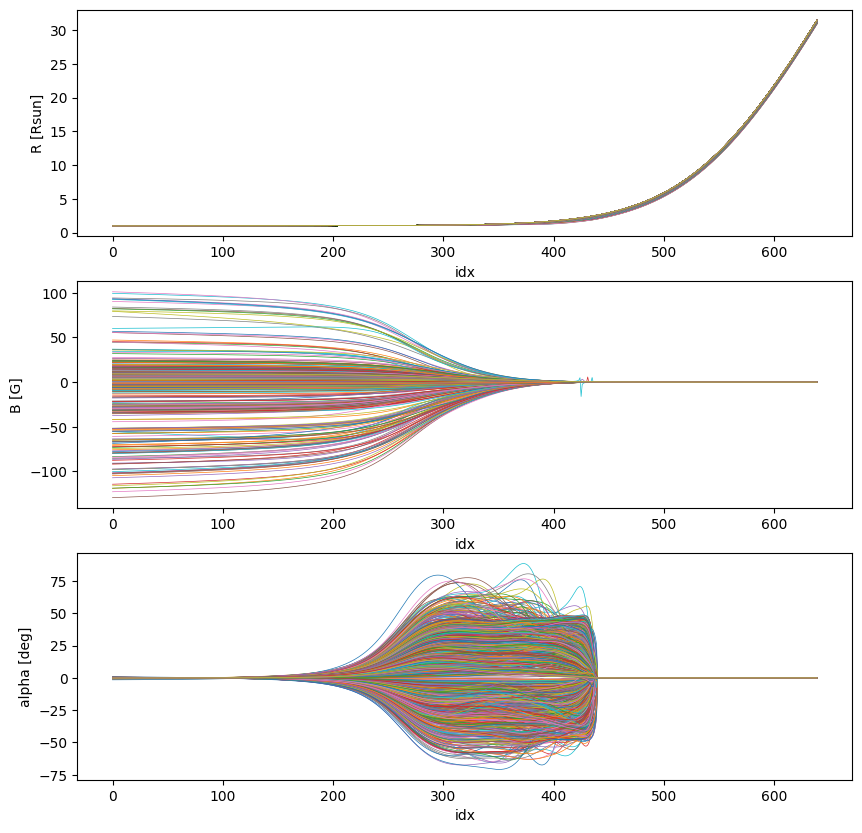

In [6]:
plot_file_data(real_files, ['R [Rsun]', 'B [G]', 'alpha [deg]'])


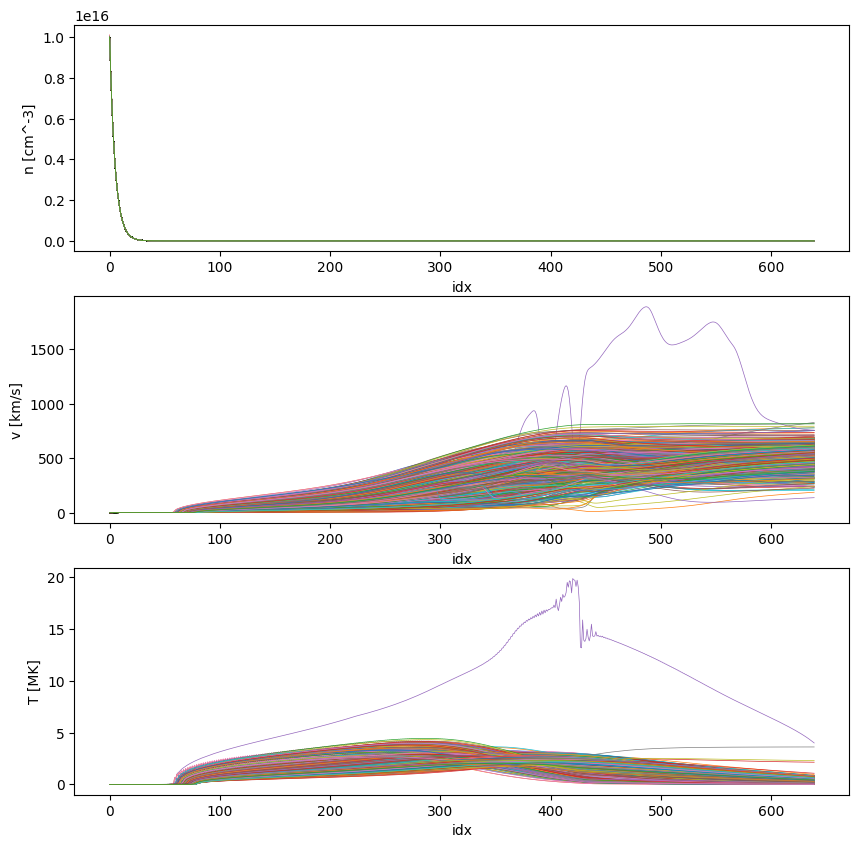

In [5]:
plot_file_data(real_files, ['n [cm^-3]', 'v [km/s]', 'T [MK]'])